In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error

# Step 2: Load the dataset
data = pd.read_csv("CM1.csv")
data


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True


In [ ]:
model = LinearRegression()

X = data.drop('defects ', axis=1)
y = data['defects '].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Perform feature selection using SelectKBest
k = 18  # Set the desired number of top features
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
selected_features_list = selected_features.tolist()  # Convert to list
print("Selected Features:", selected_features_list)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)


Selected Features: ['loc', 'v(g)', 'iv(g)', 'n', 'v', 'd', 'i', 'e', 'b', 't', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [ ]:
mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
coefficients = pd.DataFrame({"Feature": selected_features, "Coefficient": model.coef_})
print(coefficients)

Root Mean Squared Error: 0.3011571340283255
R-squared: 0.141139968028837
              Feature  Coefficient
0                 loc     0.002187
1                v(g)    -0.000913
2               iv(g)     0.009648
3                   n     0.987465
4                   v    -0.000407
5                   d     0.000532
6                   i     0.004924
7                   e    -0.178368
8                   b     2.013768
9                   t     3.210611
10          lOComment     0.004736
11            lOBlank     0.000141
12  locCodeAndComment    -2.964507
13            uniq_Op     0.012592
14          uniq_Opnd    -0.011009
15           total_Op    -0.989832
16         total_Opnd    -0.987210
17        branchCount    -0.008754


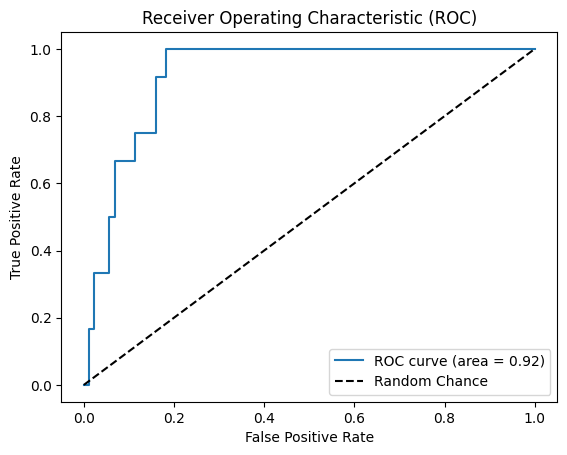

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("CM1.csv")


model = SVC(probability=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train_selected, y_train)
y_pred_prob = model.predict(X_test_selected)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_prob)
print("Accuracy:", accuracy)

mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.88
Root Mean Squared Error: 0.34641016151377546
R-squared: 0.88
              Feature  Coefficient
0                 loc     0.002187
1                v(g)    -0.000913
2               iv(g)     0.009648
3                   n     0.987465
4                   v    -0.000407
5                   d     0.000532
6                   i     0.004924
7                   e    -0.178368
8                   b     2.013768
9                   t     3.210611
10          lOComment     0.004736
11            lOBlank     0.000141
12  locCodeAndComment    -2.964507
13            uniq_Op     0.012592
14          uniq_Opnd    -0.011009
15           total_Op    -0.989832
16         total_Opnd    -0.987210
17        branchCount    -0.008754


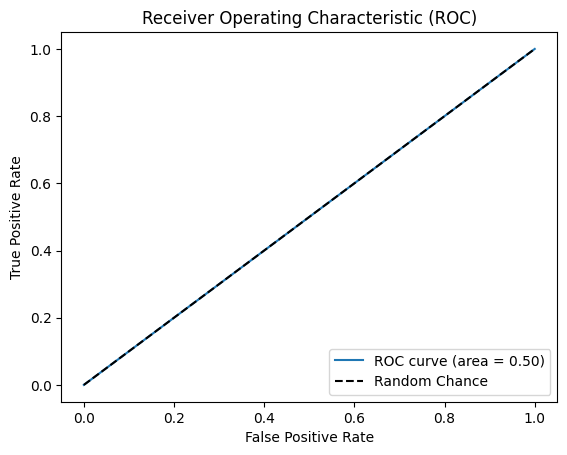

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 10: Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Step 11: Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

data = pd.read_csv("CM1.csv")
model = LogisticRegression()

X = data.drop("defects ", axis=1)
y = data["defects "].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 20
selector = SelectKBest(f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features = X.columns[selector.get_support()]
selected_features_list = selected_features.tolist()
print("Selected Features:", selected_features_list)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)



Selected Features: ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
probabilities = model.predict_proba(X_test_selected)[:, 1]
auc = roc_auc_score(y_test, probabilities)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("AUC:", auc)



mse = mean_squared_error(y_test, y_pred_prob)
rmse = mse ** 0.5
r_squared = model.score(X_test_selected, y_test)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

selected_features = X.columns[selector.get_support()]
print(coefficients)

Accuracy: 0.88
Confusion Matrix:
[[88  0]
 [12  0]]
AUC: 0.4384469696969697
Root Mean Squared Error: 0.34641016151377546
R-squared: 0.88
              Feature  Coefficient
0                 loc     0.002187
1                v(g)    -0.000913
2               iv(g)     0.009648
3                   n     0.987465
4                   v    -0.000407
5                   d     0.000532
6                   i     0.004924
7                   e    -0.178368
8                   b     2.013768
9                   t     3.210611
10          lOComment     0.004736
11            lOBlank     0.000141
12  locCodeAndComment    -2.964507
13            uniq_Op     0.012592
14          uniq_Opnd    -0.011009
15           total_Op    -0.989832
16         total_Opnd    -0.987210
17        branchCount    -0.008754


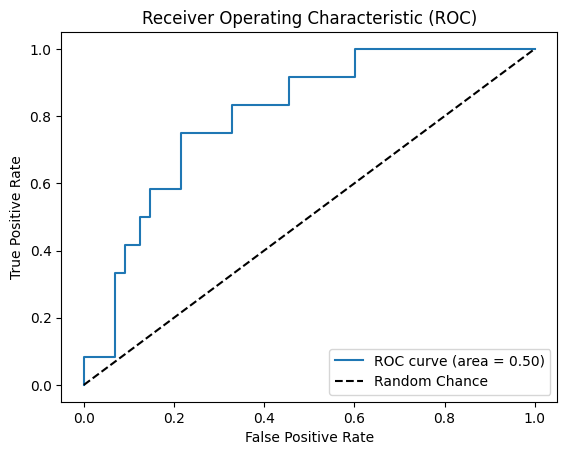

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()